In [2]:
import sys
sys.path.insert(1, './')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from skmisc.loess import loess
import seaborn as sns
from tqdm import tqdm

In [7]:
n_simulations = 100
errors_df = pd.read_parquet('../results/aging/avocados/aging_avocados_100_simulations_12_prod.parquet')
errors_df.head()

,y,y_pred,partition,timestamp,model_age,is_model_valid,simulation_id
timestamp,,,,,,,
2015-03-29,8.474308e+07,8.670544e+07,train,2015-03-29,-441,True,0
2015-04-05,8.641070e+07,8.636241e+07,train,2015-04-05,-434,True,0
2015-04-12,8.917629e+07,8.799184e+07,train,2015-04-12,-427,True,0
2015-04-19,8.381432e+07,8.869434e+07,train,2015-04-19,-420,True,0
2015-04-26,1.117918e+08,9.452832e+07,train,2015-04-26,-413,True,0


In [8]:
n_valid_models = errors_df[['simulation_id', 'is_model_valid']].drop_duplicates()['is_model_valid'].sum()
print(f"There are {n_valid_models} valid models out of {n_simulations} simulations.")

There are 90 valid models out of 100 simulations.


In [11]:
d_errors_df = pd.read_parquet('../results/aging/avocados/aging_avocados_100_simulations_12_prod_daily.parquet')
d_errors_df = d_errors_df[d_errors_df['is_model_valid'] == True]
d_errors_df.head()

,partition,simulation_id,timestamp,error,last_val_date,model_age,is_model_valid,error_rel
0,train,0,2015-03-29,0.023157,2016-06-12,-63.0,True,0.395186
1,train,0,2015-04-05,0.000559,2016-06-12,-62.0,True,0.009536
2,train,0,2015-04-12,0.013282,2016-06-12,-61.0,True,0.226672
3,train,0,2015-04-19,0.058224,2016-06-12,-60.0,True,0.993644
4,train,0,2015-04-26,0.154426,2016-06-12,-59.0,True,2.635400


In [9]:
trend_lines_df = tdt.get_trend_lines(data=d_errors_df, quantiles=[0.25, 0.50, 0.75], metric='error')

NameError: name 'tdt' is not defined

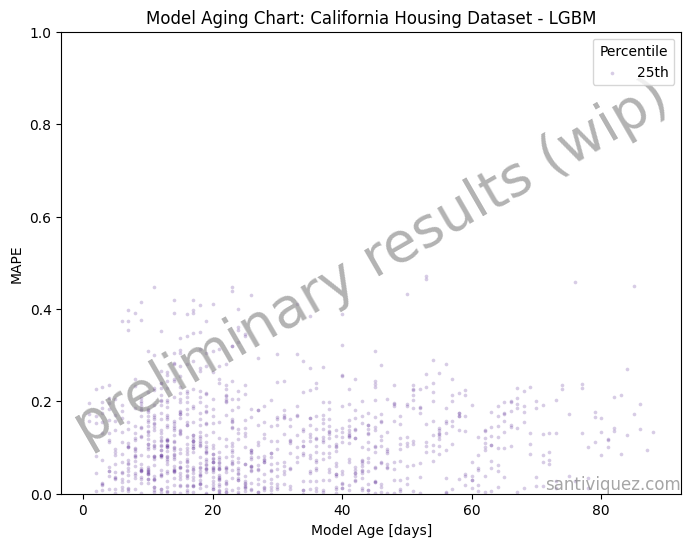

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# sns.lineplot(data=trend_lines_df, x='model_age', y='error', linewidth=1.5,
#              palette=['#E8FF3A', 'black', '#FB4748'], hue='quantile', legend=False, ax=ax)

sns.scatterplot(data=d_errors_df[d_errors_df['partition'] == 'prod'],
                x='model_age', y='error', s=7, alpha=0.20, color='#3b0280', linewidth=0, ax=ax)

ax.legend(title='Percentile', labels=['25th', 'Median', '75th'])
ax.set_xlabel('Model Age [days]')
ax.set_ylabel('MAPE')
ax.set_ylim(0, 1)

ax.text(0.5, 0.5, 'preliminary results (wip)', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.6,
        ha='center', va='center', rotation=30)
ax.text(1, 0.04, 'santiviquez.com', transform=ax.transAxes,
        fontsize=12, color='gray', alpha=0.7,
        ha='right', va='top')

ax.set_title('Model Aging Chart: California Housing Dataset - LGBM')
# plt.savefig('../figures/sketch_age_chart_calhouse_lgbm_MAPE.svg', format='svg')
plt.show()


In [26]:
d_errors_df.is_model_valid.value_counts()

True    120080
Name: is_model_valid, dtype: int64